## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("Salary_Data.csv")

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

## 1. Fitting (Simple) Linear Regression model on data now

$$ \Large y = h_0+h_1x_1$$

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
y_predict = regressor.predict(X_test)

In [ ]:
y_test, y_predict

In [ ]:
plt.scatter(X_train, y_train, color="red")
plt.plot(X_train, regressor.predict(X_train), color="cyan")

In [ ]:
plt.title("Experiance vs Salary (Training Data)")
plt.xlabel("Experiance")
plt.ylabel("Salary")

In [ ]:
plt.show()

In [ ]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_train, regressor.predict(X_train), color = "cyan")

In [ ]:
plt.title("Experiance vs Salary (Testing Data)")
plt.xlabel("Experiance")
plt.ylabel("Salary")
plt.show()

## 2. Fitting (Multiple) Linear Regression Model on data now

$$ \Large y = h_0+h_1x_1+h_2x_2+h_3x_3+\ldots+h_nx_n $$

In [ ]:
dataset = pd.read_csv("50_Startups.csv")

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
le_X = LabelEncoder()

In [ ]:
X[: ,3] = le_X.fit_transform(X[:, 3])

In [ ]:
onehotenc = OneHotEncoder(categorical_features=[3])

In [ ]:
X = onehotenc.fit_transform(X).toarray()

In [ ]:
X = X[: ,1:]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [ ]:
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, y_train)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
y_pred, y_test

## 3. Fitting Step Regression (Backward Elimination) Model on data now

In [ ]:
import statsmodels.formula.api as sm

In [ ]:
X = np.append(np.ones((50,1)).astype(int), X, 1)

In [ ]:
X_opt = X[: ,[0, 3]]

In [ ]:
regressor_OLS = sm.OLS(y, X_opt).fit()
regressor_OLS.summary()

## 4. Fitting Polynomial Regression Model on data now

$$ \Large y = h_0+h_1x_1+h_2x_1^2+h_3x_1^3+\ldots+h_nx_1^n $$

In [ ]:
dataset = pd.read_csv("Position_Salaries.csv")

In [ ]:
X = dataset.iloc[: ,1:2].values
y = dataset.iloc[: ,2].values
X.shape, y.shape

In [ ]:
plt.scatter(X, y, color="blue")
plt.plot(X[:, -1], y, color="cyan")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Polynomial type relationship")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
reg_lin = LinearRegression()
reg_poly = PolynomialFeatures(4) # Changed degree to 4 for higher accuracy.

In [ ]:
reg_lin.fit(X, y)

In [ ]:
X_poly = reg_poly.fit_transform(X)
reg_2 = LinearRegression()

In [ ]:
reg_2.fit(X_poly, y)

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, reg_lin.predict(X_grid), color="pink")
plt.plot(X_grid, reg_2.predict(reg_poly.fit_transform(X_grid)), color="red")
plt.plot(X, y, color="black")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Comparison between Linear vs. Polynomial \nPrediction against Original Values")
plt.show()

## 5. Using Support Vector Regression to fit polynomial model to data

In [ ]:
dataset = pd.read_csv('Position_Salaries.csv')

In [ ]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2:].values

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [ ]:
regressor = SVR(kernel="rbf")

In [ ]:
regressor.fit(X, y.reshape(len(y),))

In [ ]:
sc_y.inverse_transform(regressor.predict(sc_X.transform(6.5)))

In [ ]:
plt.plot(X, y, color="black")
plt.plot(X, regressor.predict(X), color="red")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Actual Salary (Black) vs. Prediction (Red)")
plt.show()

## 6. Fitting Decision Tree Regression model to data now

_Note: Not that great for 1 or 2 dimensional data as compared to the higher dimensions._

In [ ]:
dataset = pd.read_csv("Position_Salaries.csv")

In [ ]:
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
regressor = DecisionTreeRegressor(random_state=0)

In [ ]:
regressor.fit(X, y)

In [ ]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X, y, color="black")
plt.plot(X_grid, regressor.predict(X_grid), color="red")
plt.xlabel("Label")
plt.ylabel("Salary")
plt.title("Actual Salary (Black) vs. Prediction (Red)")
plt.show()

## 7. Fitting Random Forest Regression model to data now

In [2]:
dataset = pd.read_csv("Position_Salaries.csv")

In [3]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [21]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=300, random_state=0)

In [22]:
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

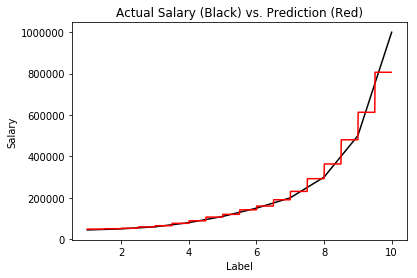

In [23]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X, y, color="black")
plt.plot(X_grid, regressor.predict(X_grid), color="red")
plt.xlabel("Label")
plt.ylabel("Salary")
plt.title("Actual Salary (Black) vs. Prediction (Red)")
plt.show()